In [2]:
import pandas as pd
import numpy as np
import itertools
from itertools import product
from itertools import combinations

In [4]:
# find which player shows a card
def find_player(guess, asker):
    
    global each_cards

    players = [1, 2, 3, 4]
    
    if asker in players:
        index = players.index(asker)
        players = players[index:] + players[:index]
        
    cyclic_items = itertools.cycle(players)
    p = next(cyclic_items)
    p = next(cyclic_items)

    
    for i in range(4):
        l = list(set(guess).intersection(each_cards[p]))
        print(l)
        if len(l) > 0:
            return p
        p = next(cyclic_items)



In [6]:
def next_guess(player_info, dont, atleast, have, guess, asking, ):
    global guesses
    players = [1, 2, 3, 4]

        
    cyclic_items = itertools.cycle(players)
    for i in range(len(guesses)):
        p = next(cyclic_items)
        guess = guesses[i]
        player_showing = find_player(guess, p)
        dont, atleast, have = asking(p, player_showing, player_info, guess, each_cards[player_showing], each_cards[player_info], dont, atleast, have)
        
        print(f"This turn player {p} asks guess {guesses[i]}. They are shown a card by player {player_showing}.")
        print("This then changes their knowledge bank to the following")
        print(f"Have: {have}")
        print(f"Don't: {dont}")
        print(f"Atleast: {atleast}")

    return dont, atleast, have

In [8]:
# function gven remaining cards, it seperates them by category, thengives all combinations where one card is selcted from each
def name_of_list(x):
    r = []
    w = []
    p = []
    for each in x:
        
        if each in rooms:
            r.append(each)
        elif each in weapons:
            w.append(each)
        else:
            p.append(each)
    return r, w, p
            

In [10]:
def custom_intersection(set1, set2):

    
    # If set2 is empty, return set1.
    if not set2:
        return set1

    if not set1:
        return set2

    # Otherwise, return the normal intersection.
    return list(set(set1).intersection(set(set2)))


def get_works(hand, num):
    found = 0
    for a in atleast[num]:
        v = custom_intersection(tuple(hand) + tuple(have[num]), a)
        if v:
            found += 1
    not_supposed = []

    if found != len(atleast[num]):
        return False
        
    # Check for removed cards    
    for d in dont[num]:
        nots = (custom_intersection(tuple(hand) + tuple(have[num]), d))
        if nots:
            for val in nots:
                not_supposed.append(val)
                break
    # DO NEXT LEVEL

    if (not not_supposed):
        return True
    else:
        return False

In [12]:
# for loops instead of the set, and then recursive function 
# This for loop goes through every hand possibility and test whether it will work based on the cards that they have, Dont, atleast, have
def get_all_p(solution_possibilites, possible_cards, have):
    
    global p1, p2, p3, p4
    all_possibilities = []
    # def one_possibility(hand):
    
    for hand in solution_possibilites:
        
        remains_of_cards = set(possible_cards) - set(hand)
        cards_1 = len(p1) - len(have[1])
        
        p1_poss = list(itertools.combinations(remains_of_cards, cards_1))
        for p1_hand in p1_poss:
            # JUST FOR LOOP FUCK THEM
            h = get_works(p1_hand, 1)
            
            if h:
                remains_2 = set(remains_of_cards) - set(p1_hand)
                cards_2 = len(p2) - len(have[2])
                p2_poss = list(itertools.combinations(remains_2, cards_2))
                
                for p2_hand in p2_poss:
                        # JUST FOR LOOP FUCK THEM
                        h = get_works(p2_hand, 2)
                        if h:
                            remains_3 = set(remains_2) - set(p2_hand)
                            cards_3 = len(p3) - len(have[3])
                
                            p3_poss = list(itertools.combinations(remains_3, cards_3))
                            for p3_hand in p3_poss:
                                    # JUST FOR LOOP FUCK THEM
                                    h = get_works(p3_hand, 3)
    
    
                                    if h:
                                        remains_4 = set(remains_3) - set(p3_hand)
                                        cards_4 = len(p4) - len(have[4])
                            
                                        p4_poss = list(itertools.combinations(remains_4, cards_4))
                                        
                                        for p4_hand in p4_poss:
                                                # JUST FOR LOOP FUCK THEM
                                                h = get_works(p4_hand, 4)            
                                                if h:
                                                    all_possibilities.append([hand, p1_hand, p2_hand, p3_hand, p4_hand])
    return all_possibilities

In [14]:
# for loops instead of the set, and then recursive function 
# This for loop goes through every hand possibility and test whether it will work based on the cards that they have, Dont, atleast, have
def get_all_p(solution_possibilites, possible_cards, have):
    
    global p1, p2, p3, p4
    all_possibilities = []
    # def one_possibility(hand):
    
    for hand in solution_possibilites:
        
        remains_of_cards = set(possible_cards) - set(hand)
        cards_1 = len(p1) - len(have[1])
        
        for p1_hand in itertools.combinations(remains_of_cards, cards_1):
            # JUST FOR LOOP FUCK THEM
            h = get_works(p1_hand, 1)
            
            if h:
                remains_2 = set(remains_of_cards) - set(p1_hand)
                cards_2 = len(p2) - len(have[2])
                
                for p2_hand in itertools.combinations(remains_2, cards_2):
                        # JUST FOR LOOP FUCK THEM
                        h = get_works(p2_hand, 2)
                        if h:
                            remains_3 = set(remains_2) - set(p2_hand)
                            cards_3 = len(p3) - len(have[3])
                
                            for p3_hand in itertools.combinations(remains_3, cards_3):
                                    # JUST FOR LOOP FUCK THEM
                                    h = get_works(p3_hand, 3)
    
    
                                    if h:
                                        remains_4 = set(remains_3) - set(p3_hand)
                                        cards_4 = len(p4) - len(have[4])
                            
                                        
                                        for p4_hand in itertools.combinations(remains_4, cards_4):
                                                # JUST FOR LOOP FUCK THEM
                                                h = get_works(p4_hand, 4)            
                                                if h:
                                                    all_possibilities.append([hand, p1_hand, p2_hand, p3_hand, p4_hand])
    return all_possibilities

In [16]:
### FUNCTION HERE TO BASICALLY CHANGE WHATS POSSIBLE AFTER YOU'VE ALREADY CREATED EACH PLAYER'S KNOWLEDGE BASE, SO YOU DONT HAVE TO RUN THROUGH THIS EVERYTIME





In [18]:
import time
import numpy as np

def get_data(all_possibilities, possible_cards, have):
    # Input data
    start_time = time.time()
    data = all_possibilities
    
    # Flatten all unique items
    all_items = set()
    for player_list in data:
        for sublist in player_list:
            all_items.update(sublist)
    
    # Create a mapping of items to indices
    item_to_index = {item: idx for idx, item in enumerate(sorted(all_items))}
    
    # Initialize the NumPy array (rows = lists, cols = unique items)
    num_rows = len(data)
    result_array = np.zeros((num_rows, len(item_to_index)), dtype=int)
    
    # Fill the array based on sublist positions
    for row_idx, player_list in enumerate(data):
        for sublist_idx, sublist in enumerate(player_list):
            value = [0, 1, 2, 3, 4][sublist_idx]  # Values for the first, second, and third sublist
            for item in sublist:
                result_array[row_idx, item_to_index[item]] = value
                
    df = pd.DataFrame(result_array, columns = sorted(list(possible_cards)))

    
    idx = 0
    for i in have:
        for card in i:
            df[i] = idx
        idx += 1
    
    return df


In [20]:
# UTILITY FUNCTION

def shown(df, card, Y):
    return df[df[card] == Y]
    
# I am not shown any cards by player Y, and my guess was guess
def not_shown(df, guess, Y):
    return df[(df[guess[0]] != Y) & (df[guess[1]] != Y) & (df[guess[2]] != Y)]

# Player X asks Player Y and One card is shown from guess
def one_card(df, X, Y, guess):
    return df[(df[guess[0]] == Y) | (df[guess[1]] == Y) | (df[guess[2]] == Y)]

# Player X asks Player Y and No card is shown from guess
def no_card(df, X, Y, guess):
    return df[(df[guess[0]] != Y) & (df[guess[1]] != Y) & (df[guess[2]] != Y)]




In [23]:
import numpy as np



def combo_mask_only_ones(df, combo, guesses, player):
    """
    Return a boolean mask for all rows in `df` that satisfy:
        For each i where combo[i] == 1:
            df[guesses[i]] == player
        For each i where combo[i] == 0:
            no constraint (ignore that column)
    """
    # Build a list of conditions only for columns where combo[i] == 1
    conditions = [
        df[col].eq(player)
        for col, val in zip(guesses, combo)
        if val == 1
    ]
    # If combo contains no "1"s, mask should include *all* rows
    if not conditions:
        return np.ones(len(df), dtype=bool)
    # Combine all conditions via logical AND
    return np.logical_and.reduce(conditions)



In [25]:
import time 

def get_utility2(guess, df, player):

    uno = time.time()
    original_length = len(df)
    combinations = list(product([0, 1], repeat=3))
    utility = 0

    # if player is the next one, remove 
    p = 2
    temp_og = df
    if player > 2:
        while p != player: 
            temp_og = not_shown(temp_og, guess, p)
            p += 1
            
    #player = 2
    dos = time.time()
    for combo in combinations[1:]:
        mask = np.logical_and.reduce([
            temp_og[col].eq(player) if val == 1 else temp_og[col].ne(player)
            for col, val in zip(guess, combo)
        ])

        temp = temp_og[mask]
        prob = (len(temp)/original_length)

        max_count = 0
        if prob > 0:
            # Find how many cards will be removed
            
            filtered_values = [val for val, m in zip(guess, combo) if m == 1]
            max_count = (temp_og[filtered_values] == player).sum().max()
            

        utility += (prob * max_count)    
    tres = time.time()
    return round(utility, 2)


In [27]:
### PASS IN ALL GUESSES FOR SAME PLAYER, SO YOU DON'T HAVE TO DO THE DF BUILDING FOR EACH TIME

In [32]:
my_guess1 = ["Conservatory", "Rope", "Mr. Green"]
my_guess2 = ["Conservatory", "Mrs. White", "Lead Pipe"]

guesses = []
def get_next_guess(my_guess):

    global have_all, dont_all, atleast_all, guesses
    guesses = []
    guesses += [my_guess]
    for i in range(3):
        selected_person = random.choice(people)
        selected_room = random.choice(rooms)
        selected_weapon = random.choice(weapons)
        guesses.append([selected_person, selected_room, selected_weapon])

    guesses += [my_guess]
    for i in range(3):
        selected_person = random.choice(people)
        selected_room = random.choice(rooms)
        selected_weapon = random.choice(weapons)
        guesses.append([selected_person, selected_room, selected_weapon])
    
    
    for player in range(2,5):

        have = have_all[player]
        dont = dont_all[player]
        atleast = atleast_all[player]

        print(f"Generating data for player {player}")

        dont, atleast, have = get_info(player, dont, atleast, have)
    
        have = [list(set(h)) for h in have]
        dont_all[player] = dont
        atleast_all[player] = atleast
        have_all[player] = have
        
        have_cards = [item for sublist in have for item in sublist]
        possible_cards = set(all_cards) - set(have_cards)
        r, w, p = name_of_list(possible_cards)
        
        solution_possibilites = list(itertools.product(r, w, p))
    
        print("Getting all Possibilities")
        all_possibilities = get_all_p(solution_possibilites, possible_cards, have)
        print("Getting Data")
        df = get_data(all_possibilities, possible_cards, have)
        print("Making Data")
        player_dfs[player] = df
        print()
    
    print("Generating data for player 1")
    player = 1
    have = have_all[player]
    dont = dont_all[player]
    atleast = atleast_all[player]
    dont, atleast, have = get_info(player, dont, atleast, have)
    have[1] += p1
    
    have = [list(set(h)) for h in have]
    dont_all[player] = dont
    atleast_all[player] = atleast
    have_all[player] = have
    
    have_cards = [item for sublist in have for item in sublist]
    have_cards
    possible_cards = set(all_cards) - set(have_cards)
    r, w, p = name_of_list(possible_cards)
    
    solution_possibilites = list(itertools.product(r, w, p))
    
    all_possibilities = get_all_p(solution_possibilites, possible_cards, have)
    df = get_data(all_possibilities, possible_cards, have)
    player_dfs[player] = df
    
    print(f"With our four knowledge banks this is what we know. We have a total of {len(player_dfs[1])} possibilities. \n Player 2 has a total \
    of {len(player_dfs[2])} possibilities. \n Player 3 has a total of {len(player_dfs[3])} possibilities. \n Player 4 has a total of {len(player_dfs[4])} \
    possibilities.")
    
    # Generate all combinations of 1 and 0 for three values
    combinations = list(product([0, 1], repeat=3))
    
    # Print the combinations
    
    possible_cards = list(player_dfs[1].columns)
    r, w, p = name_of_list(possible_cards)
    print(r)
    print(w)
    print(p)
    
    # Generate all combinations of 3 cards
    combinations_of_three = list(itertools.product(r, w, p))
    
    utils = {}
    for c in combinations_of_three:
        utility = 0
        for p in range(2,5):
            u = get_utility(c, player_dfs[1], p)
            print(u)
            utility += u
        utils[c] = utility
    print("HERE IS UTIL")
    print(utils)
    
    res = pd.DataFrame(index = utils.keys(), data = utils.values())
    res = res[res[0] != 0].sort_values(by = 0)
    print("HERE IS RES")
    display(res)
    
    my_data = player_dfs[1]
    
    knowledge = pd.DataFrame(columns = [2, 3, 4])
    guesses = []
    
    for i in range(50):
        guess = res.iloc[i].name
        guesses.append(guess)
        print(guess)
        a,b,c = get_knowledge_given(my_data, guess)
        knowledge.loc[len(knowledge)] = [a,b,c]
    knowledge.index = guesses
    
    df = pd.DataFrame(columns = ['Information', 'Knowledge'])
    df['Information'] = res[:50]
    df['Knowledge'] = knowledge.mean(axis = 1)
    print("HERE IS THE INFO KNOWLEDGE")
    display(df)
    
    # 1) Min-max scale to [0, 1] for both 'information' and 'knowledge'
    info_min, info_max = df['Information'].min(), df['Information'].max()
    know_min, know_max = df['Knowledge'].min(), df['Knowledge'].max()
    
    df['info_norm'] = (df['Information'] - info_min) / (info_max - info_min)
    df['know_norm'] = (df['Knowledge'] - know_min) / (know_max - know_min)
    
    # 2) In normalized space, (0, 1) is the top-left corner.
    #    Compute the Euclidean distance of each point to (0, 1).
    distances = np.sqrt((df['info_norm'] - 0)**2 + (df['know_norm'] - 1)**2)
    
    # 3) Find the point with the smallest distance
    closest_idx = distances.idxmin()
    closest_point = df.loc[closest_idx]
    df.plot.scatter('Information', 'Knowledge')
    
    
    print("Point chosen: Most Top Left")
    print(closest_point[['Information', 'Knowledge']])
    guess = closest_point.name
    return (guess)


In [34]:
def get_knowledge_given(my_data, guess):
    
    df = my_data
    # PROB TWO HAS ATLEAST ONE
    pb = len(one_card(my_data, 1, 2, guess))/len(my_data)
    # If two shows me a card, then everyone knows that 2 has atleast one show impact on player three and 4
    three_knowledge_shown2 = len(one_card(player_dfs[3], 1, 2, guess)) * pb
    four_knowledge_shown2 = len(one_card(player_dfs[4], 1, 2, guess)) * pb

    '''
    print("LENGTH of my data", len(my_data))
    print("Two Shows")
    print('Probability two has atleast one', pb)
    print("Cards remain for player 3:", len(one_card(player_dfs[3], 1, 2, guess)))
    print("Cards remain for player 4:", len(one_card(player_dfs[4], 1, 2, guess)))
    print("Value for P3:", (three_knowledge_shown2))
    print("Value for P4:", (four_knowledge_shown2))
    '''
    # prob two has none
  
    notshownbytwo = not_shown(df, guess, 2)
    shownbythree = one_card(notshownbytwo, 1, 3, guess)
    pb_shownbythree = len(shownbythree)/len(df)
    # if three shows me a card, everyone knows two aint got shitttt
    not_two_two = not_shown(player_dfs[2], guess, 2)
    not_two_three = not_shown(player_dfs[3], guess, 2)
    not_two_four =  not_shown(player_dfs[4], guess, 2)

    # Now we need to add the part where three shows me a card and everyone knows that
    two_knowledge_shown3 = len(one_card(not_two_two, 1, 3, guess)) * pb_shownbythree
    four_knowledge_shown3 = len(one_card(not_two_four, 1, 3, guess)) * pb_shownbythree

    # prob three has none
    notshownbythree = not_shown(notshownbytwo, guess, 3)
    shownbyfour = one_card(notshownbythree, 1, 4, guess)
    pb_shownbyfour = len(shownbyfour)/len(df)
    pb_shownbyfour

    #print('prob four has atleast one', pb_shownbyfour)


    # remove three having any too now
    not_three_two = not_shown(not_two_two, guess, 3)
    not_three_three = not_shown(not_two_three, guess, 3)
    not_three_four =  not_shown(not_two_four, guess, 3)
    # Now we need to add the part where four shows me a card and everyone knows that
    two_knowledge_shown4 = len(one_card(not_three_two, 1, 4, guess)) * pb_shownbyfour
    three_knowledge_shown4 = len(one_card(not_three_four, 1, 4, guess)) * pb_shownbyfour

    #print('impact on two and three')
    #print(two_knowledge_shown4, three_knowledge_shown4)

    # IF NO ONE SHOWS CARDS
    # prob four has none
    notshownbyfour = not_shown(notshownbythree, guess, 4)
    pb_notshown = len(notshownbyfour)/len(df)

    # remove four having any too now
    two_knowledge_notshown = len(not_shown(not_three_two, guess, 4)) * pb_notshown
    three_knowledge_notshown = len(not_shown(not_three_three, guess, 4)) * pb_notshown
    four_knowledge_notshown =  len(not_shown(not_three_four, guess, 4)) * pb_notshown
    # Now we need to add the part where four shows me a card and everyone knows that

    #a = ((two_knowledge_shown3 + two_knowledge_shown4 + two_knowledge_notshown)/len(player_dfs[2]))
    #b = ((three_knowledge_shown2 + three_knowledge_shown4 + three_knowledge_notshown)/len(player_dfs[3]))
    #c = ((four_knowledge_shown2 + four_knowledge_shown3 + four_knowledge_notshown)/len(player_dfs[4]))

        
    a = ((two_knowledge_shown3 + two_knowledge_shown4 + two_knowledge_notshown))
    b = ((three_knowledge_shown2 + three_knowledge_shown4 + three_knowledge_notshown))
    c = ((four_knowledge_shown2 + four_knowledge_shown3 + four_knowledge_notshown))


    
    return a, b, c

In [50]:
### Main Game Code

In [52]:
# Set Up Our Card Potentialities and What Each Other Person Has

# Repeat {
# Best Guess
# Guess and Update Everyone
# Other People Guess
}

SyntaxError: unmatched '}' (3559044390.py, line 7)

### Set Up

In [39]:

#people = [ "Miss Scarlet", "Colonel Mustard", "Mrs. White", "Mr. Green", "Mrs. Peacock", "Professor Plum" ]
#rooms = [ "Kitchen", "Ballroom", "Conservatory", "Dining Room", "Billiard Room", "Library", "Lounge", "Hall", "Study" ]
#weapons = [ "Candlestick", "Knife", "Lead Pipe", "Revolver", "Rope", "Wrench" ]

people = [ "Miss Scarlet", "Colonel Mustard", "Mrs. White", "Mr. Green" ]
rooms = [ "Kitchen", "Ballroom", "Conservatory", "Dining Room", "Billiard Room"]
weapons = [ "Candlestick", "Knife", "Lead Pipe", "Revolver"]

all_cards = people + rooms + weapons

print("The following are all the cards")
print(f"There are a total of {len(all_cards)} cards")
print(people) 
print(rooms)
print(weapons)

import random
solution = random.sample(people, 1) + random.sample(weapons, 1) + random.sample(rooms, 1)
remaining_cards = set(all_cards) - set(solution)
p1 = random.sample(list(remaining_cards), 3)
remaining_cards = set(remaining_cards) - set(p1)
p2 = random.sample(list(remaining_cards), 3)
remaining_cards = set(remaining_cards) - set(p2)
p3 = random.sample(list(remaining_cards), 2)
remaining_cards = set(remaining_cards) - set(p3)
p4 = random.sample(list(remaining_cards), 2)
each_cards = [solution, p1, p2, p3, p4]

print()
print("After the cards are split up here is how they are handed out")
print(f"The solution is: {solution}")
print(f"My cards are: {p1}")
print(f"Player Two cards are: {p2}")
print(f"Player Three cards are: {p3}")
print(f"Player Four cards are: {p4}")
print()

print("STEP ONE")
print("Generating the Guesses")
print("For now even my guess is random")

guesses = []
for i in range(4):
    selected_person = random.choice(people)
    selected_room = random.choice(rooms)
    selected_weapon = random.choice(weapons)
    guesses.append([selected_person, selected_room, selected_weapon])

print("Done Generating")
print()



guesses = []

player_dfs = {}
dont_all = [[[],[],[],[],[]],
            [[],[],[],[],[]],
            [[],[],[],[],[]],
            [[],[],[],[],[]],
            [[],[],[],[],[]]]
atleast_all = [[[],[],[],[],[]],
            [[],[],[],[],[]],
            [[],[],[],[],[]],
            [[],[],[],[],[]],
            [[],[],[],[],[]]]
have_all = [[[],[],[],[],[]],
            [[],[],[],[],[]],
            [[],[],[],[],[]],
            [[],[],[],[],[]],
            [[],[],[],[],[]]]

have = [[],[],[],[],[]]
dont = [[], [], [], [], []]
atleast = [[],[],[],[],[]]

# Set have for everyone to know what player 1 has

have_all[1][1] += p1

have = p1

print("HAVE THIS ONE", have)

possible_cards = set(all_cards) - set(have)

r, w, p = name_of_list(possible_cards)

#r = [room_in[player]]
### FIX THIS CHECKING ONLY FOR ONE ROOM
solution_possibilites = list(itertools.product(r, w, p))

print("Getting all Possibilities")
all_possibilities = get_all_p(solution_possibilites, possible_cards, have_all[1])
print("Getting Data")
df = get_data(all_possibilities, possible_cards, have_all[1])
print("Making Data")
#player_dfs[player] = df
print()


player_dfs[1] = df

possible_cards = set(all_cards)
r, w, p = name_of_list(possible_cards)
solution_possibilites = list(itertools.product(r, w, p))
all_possibilities = get_all_p(solution_possibilites, possible_cards, [[],[],[],[],[]])
df = get_data(all_possibilities, possible_cards, [[],[],[],[],[]])  

player_dfs[2] = df
player_dfs[3] = df
player_dfs[4] = df

The following are all the cards
There are a total of 13 cards
['Miss Scarlet', 'Colonel Mustard', 'Mrs. White', 'Mr. Green']
['Kitchen', 'Ballroom', 'Conservatory', 'Dining Room', 'Billiard Room']
['Candlestick', 'Knife', 'Lead Pipe', 'Revolver']

After the cards are split up here is how they are handed out
The solution is: ['Mrs. White', 'Lead Pipe', 'Kitchen']
My cards are: ['Ballroom', 'Dining Room', 'Revolver']
Player Two cards are: ['Conservatory', 'Candlestick', 'Knife']
Player Three cards are: ['Colonel Mustard', 'Mr. Green']
Player Four cards are: ['Miss Scarlet', 'Billiard Room']

STEP ONE
Generating the Guesses
For now even my guess is random
Done Generating

HAVE THIS ONE ['Ballroom', 'Dining Room', 'Revolver']
Getting all Possibilities
Getting Data
Making Data



### Get Best Guess

In [41]:
import time 

def get_utility3(guess, df, player, original_length):

    uno = time.time()
    combinations = list(product([0, 1], repeat=3))
    utility = 0

    #player = 2
    dos = time.time()
    values = (df[list(guess)] == player).sum()
    for combo in combinations[1:]:
        mask = np.logical_and.reduce([
            df[col].eq(player) if val == 1 else df[col].ne(player)
            for col, val in zip(guess, combo)
        ])

        temp = df[mask]
        prob = (len(temp)/original_length)
        max_value = 0
        if prob > 0:
            # Find how many cards will be removed
            
            included_items = [
                (item, val)
                for (item, val, c) in zip(guess, values, combo)
                if c == 1
            ]

            # 4) Find the item with the maximum value among the included ones
            if included_items:
                max_item, max_value = max(included_items, key=lambda x: x[1])
                        
        utility += (prob * max_value)   
    tres = time.time()
    return round(utility, 2)


In [42]:
### instead of testing all questions, try questions that have a vibe and then go from there based on which one seems to be the overall best, atleast for first few questions




In [43]:
def get_card(group,cards):
    for c in cards:
        if c in group:
            return c
    return None



In [48]:
# First question can be generalized to what is best

def generalize(combinations_of_three):
    r = get_card(rooms, p1)
    p = get_card(people, p1)
    w = get_card(weapons, p1)
    
    # Have one card
    # Let's say its the room
    questions = []
    idx = 0
    for c in combinations_of_three:
        
        if r in c and p not in c and w not in c:
            if idx > 1:
                break
            idx += 1
            questions.append(c)
    
    idx = 0
    for c in combinations_of_three:
    
        if r not in c and p in c and w not in c:
            if idx > 1:
                break
            idx += 1
            questions.append(c)
            
    idx = 0       
    for c in combinations_of_three:
    
        if r not in c and p not in c and w in c:
            if idx > 1:
                break
            idx += 1
            questions.append(c)
            
    # Have two cards
    idx = 0
    for c in combinations_of_three:
    
        if r in c and p in c and w not in c:
            if idx > 1:
                break
            idx += 1
            questions.append(c)
    
    idx = 0
    for c in combinations_of_three:
    
        if r in c and p not in c and w in c:
            if idx > 1:
                break
            idx += 1
            questions.append(c)
    
    idx = 0
    for c in combinations_of_three:
    
        if r not in c and p in c and w in c:
            if idx > 1:
                break
            idx += 1
            questions.append(c)
    
    # Have three cards
    
    idx = 0
    for c in combinations_of_three:
    
        if r  in c and p in c and w in c:
            if idx > 1:
                break
            idx += 1
            questions.append(c)
    # Have no cards
    
    idx = 0
    for c in combinations_of_three:
    
        if r  not in c and p not in c and w not in c:
            if idx > 1:
                break
            idx += 1
            questions.append(c)
    len(questions)
    return questions


In [50]:
### FIND THE BEST QUESTION

def get_questions(to_generalize):
    print(f"With our four knowledge banks this is what we know. We have a total of {len(player_dfs[1])} possibilities. \n Player 2 has a total \
    of {len(player_dfs[2])} possibilities. \n Player 3 has a total of {len(player_dfs[3])} possibilities. \n Player 4 has a total of {len(player_dfs[4])} \
    possibilities.")
    
    # Generate all combinations of 1 and 0 for three values
    combinations = list(product([0, 1], repeat=3))
    
    # Print the combinations
    
    possible_cards = list(player_dfs[1].columns)
    
    r, w, p = name_of_list(possible_cards)

    
    # Generate all combinations of 3 cards
    #p = [room_in[player]]
    combinations_of_three = list(itertools.product(r, w, p))
    print(len(combinations_of_three))
    
    if to_generalize:
        return generalize(combinations_of_three)
    else:
        return combinations_of_three

questions = get_questions(True)

With our four knowledge banks this is what we know. We have a total of 7560 possibilities. 
 Player 2 has a total     of 2016000 possibilities. 
 Player 3 has a total of 2016000 possibilities. 
 Player 4 has a total of 2016000     possibilities.
80


In [52]:

def get_utility_questions(questions):
    s = time.time()
    utils = {}
    original_length = len(player_dfs[1])
    scores = [[], [], [], [], []]
    for player in range(2,5): 
        for c in questions:
    
            p = 2
            temp_og = player_dfs[1]
            if player > 2:
                while p != player: 
                    temp_og = not_shown(temp_og, c, p)
                    p += 1

            sc = get_utility3(c, temp_og, player, original_length)
            scores[player] += [sc]
    
    result = [sum(col) for col in itertools.zip_longest(*scores, fillvalue=0)]
    res = pd.DataFrame(index = questions, data = result)

    res = res[res[0] != 0].sort_values(by = 0)
    res.columns = ['Information']
    return res

results = get_utility_questions(questions)
results

,Information
"(Ballroom, Revolver, Colonel Mustard)",1475.35
"(Ballroom, Revolver, Miss Scarlet)",1475.35
"(Ballroom, Candlestick, Colonel Mustard)",1578.22
"(Ballroom, Candlestick, Miss Scarlet)",1578.22
"(Billiard Room, Revolver, Colonel Mustard)",1578.22
"(Billiard Room, Revolver, Miss Scarlet)",1578.22
"(Billiard Room, Candlestick, Colonel Mustard)",1733.62
"(Billiard Room, Candlestick, Miss Scarlet)",1733.62


### Get Knowledge Given

In [55]:
def get_knowledge(questions):
    my_data = player_dfs[1]
    knowledge = pd.DataFrame(columns = [2, 3, 4])
    guesses = []
    some_range = len(questions) - 1
    for i in range(some_range):
        guess = questions[i]
        guesses.append(guess)
        a,b,c = get_knowledge_given(my_data, guess)
        
        ### FUNCTION FOR AGREGATING SCORES HERE!!!!
        
        knowledge.loc[len(knowledge)] = [a,b,c]
    knowledge.index = guesses
    
    return knowledge

# Min because this is worst case situation
#df['Knowledge'] = knowledge.min(axis = 1)
#print("HERE IS THE INFO KNOWLEDGE")
res = get_knowledge(questions)
res

,2,3,4
"(Ballroom, Candlestick, Colonel Mustard)",154450.000000,671400.000000,741400.000000
"(Ballroom, Candlestick, Miss Scarlet)",154450.000000,671400.000000,741400.000000
"(Billiard Room, Revolver, Colonel Mustard)",154450.000000,671400.000000,741400.000000
"(Billiard Room, Revolver, Miss Scarlet)",154450.000000,671400.000000,741400.000000
"(Ballroom, Revolver, Colonel Mustard)",188910.000000,467460.000000,509220.000000
"(Ballroom, Revolver, Miss Scarlet)",188910.000000,467460.000000,509220.000000
"(Billiard Room, Candlestick, Colonel Mustard)",111862.888889,832155.111111,901445.777778


In [56]:
### AGGREGATING FUNCTION
def aggregate(results, res):
    df = pd.DataFrame(columns = ['Information', 'Knowledge'])
    df['Knowledge'] = (res * [.4, .35, .25]).sum(axis = 1)
    df['Information'] = results
    return df

In [59]:
df = aggregate(results, res)

In [61]:
df

,Information,Knowledge
"(Ballroom, Candlestick, Colonel Mustard)",1578.22,482120.000000
"(Ballroom, Candlestick, Miss Scarlet)",1578.22,482120.000000
"(Billiard Room, Revolver, Colonel Mustard)",1578.22,482120.000000
"(Billiard Room, Revolver, Miss Scarlet)",1578.22,482120.000000
"(Ballroom, Revolver, Colonel Mustard)",1475.35,366480.000000
"(Ballroom, Revolver, Miss Scarlet)",1475.35,366480.000000
"(Billiard Room, Candlestick, Colonel Mustard)",1733.62,561360.888889


### Get Best Guess

Point chosen: Most Top Left
                                          Information  Knowledge
(Ballroom, Candlestick, Colonel Mustard)      1578.22   482120.0


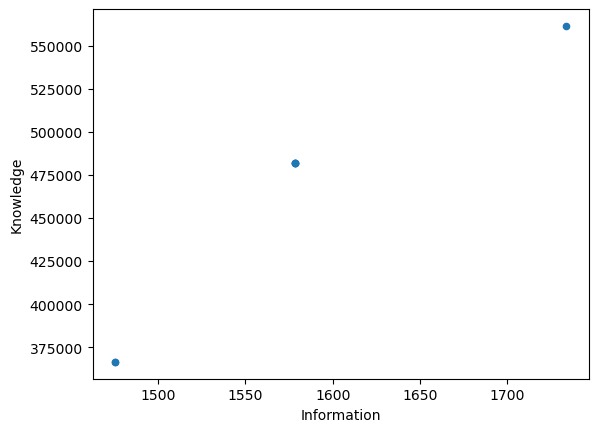

In [65]:
def get_best_guess(df):
    # 1) Min-max scale to [0, 1] for both 'information' and 'knowledge'
    info_min, info_max = df['Information'].min(), df['Information'].max()
    know_min, know_max = df['Knowledge'].min(), df['Knowledge'].max()
    
    df['info_norm'] = (df['Information'] - info_min) / (info_max - info_min)
    df['know_norm'] = (df['Knowledge'] - know_min) / (know_max - know_min)
    
    
    # 2) In normalized space, (0, 1) is the top-left corner.
    #    Compute the Euclidean distance of each point to (0, 1).
    distances = np.sqrt((df['info_norm'] - 0)**2 + (df['know_norm'] - 1)**2)
    
    # 3) Find the point with the smallest distance
    closest_idx = distances.idxmin()
    closest_point = df[df.index == closest_idx]
    df.plot.scatter('Information', 'Knowledge')
    
    
    print("Point chosen: Most Top Left")
    print(closest_point[['Information', 'Knowledge']])
    guess = closest_point.index[0]
    return guess

guess = get_best_guess(df)

In [66]:
each_cards

[['Mrs. White', 'Lead Pipe', 'Kitchen'],
 ['Ballroom', 'Dining Room', 'Revolver'],
 ['Conservatory', 'Candlestick', 'Knife'],
 ['Colonel Mustard', 'Mr. Green'],
 ['Miss Scarlet', 'Billiard Room']]

In [69]:
def get_info(player_info, player_asking, guess):
    players = [1, 2, 3, 4]

    have = have_all[player_info]
    dont = dont_all[player_info]
    atleast = atleast_all[player_info]

    player_showing = find_player(guess, player_asking)
    dont, atleast, have = asking(player_asking, player_showing, player_info, guess, each_cards[player_showing], each_cards[player_info], dont, atleast, have)

    print(f"Knowledge bank for Player {player_info} from Player {player_asking}, getting card shown by player {player_showing}.")

    return dont, atleast, have


In [71]:


#def another_player(X, Y, Z, guess, Y_cards, Z_cards:
# X: who is asking
# Y: who shows
# Z: Who knowledge bank is being updated
# data: Old Knowledge bank

def asking(X, Y, Z, guess, Y_cards, Z_cards, dont, atleast, have):
    
    players = [1, 2, 3, 4]
    if X in players:
        index = players.index(X)
        players = players[index:] + players[:index]
        
    cyclic_items = itertools.cycle(players)
    
    #the next person shows the card
    next_person = False
    if Y == (X%4)+1:
        next_person = True
        
    if next_person:
        
        # that user asks
        if Z == X:
            temp = list(set(guess).intersection(set(Y_cards)))
            if len(temp) > 0:
                print("HEREA")
                have[Y].append(temp[0])

        # that user shows the card
        elif Y == Z:
            # TO DO: RANDOM SELECTION
            temp = list(set(guess).intersection(set(Z_cards)))
            if len(temp) > 0:
                print("HEREB")
                have[Z].append(temp[0])

        else:    
            atleast[Y] += [guess]
        # just make it so that you know they have atleast one
    
    else:
    
        # everyone in between doesn't have
        p = next(cyclic_items)
        p = next(cyclic_items)
    
        
        while p != Y:
            dont[p] += [guess]
            p = next(cyclic_items)
            
        if Z == X: 
            print("HEREC")
            temp = list(set(guess).intersection(set(Y_cards)))
            if len(temp) > 0:   
                have[Y].append(temp[0])
        
        elif Z == Y:
            print("HERED")

            temp = list(set(guess).intersection(set(Z_cards)))
            if len(temp) > 0:
                have[Z].append(temp[0])
            
        else:
            atleast[Y] += [guess]

    return dont, atleast, have

In [157]:
p2

['Kitchen', 'Ballroom', 'Candlestick']

### Actually Ask the Question

In [73]:
def ask_question(player, guess):

    global dont_all, atleast_all, have_all
    
    for who_info_changing in range(1,5):
        a = get_info(who_info_changing, player, guess)
        dont_all[who_info_changing] = a[0]
        atleast_all[who_info_changing] = a[1]
        have_all[who_info_changing] = a[2]
    
    


### Make Other Players Guess

In [76]:
# Guess from cards they dont have
def get_guess_forothers(player):
    have = have_all[player]
    cards = each_cards[player]
    rem = set(all_cards) - set(cards)
    
    r, w, p = name_of_list(rem)
    combinations_of_three = list(itertools.product(r, w, p))
    
    random_number = random.randrange(1, len(combinations_of_three))
    guess = combinations_of_three[random_number]
    return guess



In [78]:
def simulate_turns():
    for player in range(2,5):
        print("Turn:", player)
        guess = get_guess_forothers(player)
        print("Asking", guess)
        ask_question(player, guess)

simulate_turns()

Turn: 2
Asking ('Billiard Room', 'Revolver', 'Mrs. White')
[]
['Billiard Room']
Knowledge bank for Player 1 from Player 2, getting card shown by player 4.
[]
['Billiard Room']
HEREC
Knowledge bank for Player 2 from Player 2, getting card shown by player 4.
[]
['Billiard Room']
Knowledge bank for Player 3 from Player 2, getting card shown by player 4.
[]
['Billiard Room']
HERED
Knowledge bank for Player 4 from Player 2, getting card shown by player 4.
Turn: 3
Asking ('Conservatory', 'Candlestick', 'Mrs. White')
[]
[]
['Candlestick', 'Conservatory']
Knowledge bank for Player 1 from Player 3, getting card shown by player 2.
[]
[]
['Candlestick', 'Conservatory']
HERED
Knowledge bank for Player 2 from Player 3, getting card shown by player 2.
[]
[]
['Candlestick', 'Conservatory']
HEREC
Knowledge bank for Player 3 from Player 3, getting card shown by player 2.
[]
[]
['Candlestick', 'Conservatory']
Knowledge bank for Player 4 from Player 3, getting card shown by player 2.
Turn: 4
Asking ('Kit

### Construct New Knowledge Banks for Everyone

In [80]:
def new_data(player):
    data = player_dfs[player]
    dont = dont_all[player]
    atleast = atleast_all[player]
    have = have_all[player]
    
    ### For have only keep rows where that person has it
    for p in range(1,5):
        if have[p]:
            for col in have[p]:
                data = data[data[col] == p]
    
    ### For atleast make sure all rows are where they have atleast one
    for p in range(1,5):
        if atleast[p]:
            for atl in atleast[p]:
                mask = (data[atl[0]] == p) | (data[atl[1]] == p) | (data[atl[2]] == p)
                data = data[mask]
    
    ### For dont
    for p in range(1,5):
        if dont[p]:
            for dt in dont[p]:
                mask = (data[dt[0]] != p) & (data[dt[1]] != p) & (data[dt[2]] != p)
                data = data[mask]

    return data

for i in range(1,5):
    player_dfs[i] = new_data(i)

In [82]:
for i in range(1,5):
    print(len(player_dfs[i]))

365
724
4262
2672


In [ ]:

possible_cards = list(player_dfs[1].columns)
r, w, p = name_of_list(possible_cards)


### Get Card Hands of All Three Other Players Players

### Utility Function

### How much info does it reveal?


In [ ]:
# Get the number if I ask player 2
df = player_dfs[1]

In [ ]:
# Depending on the questions who shows me lets say 2 shows me a card, what does that mean for everyone?
# First change act each situation out maybe, first find who can show you something


# For each combination, 
# prob it happens (based on your dataset) * how many cards it eliminates for each of the other players data set


for player in range(2,5):
    if set(guess).intersection():
        print(player)



#asking(1, 3, 2, guess, each_cards[2], each_cards[2], dont_all[2], atleast_all[2], have_all[2])
p

In [ ]:
get_utility(guess, player_dfs[2], 

In [ ]:
# IF TWO SHOWS ME A CARD, THATS NO GIVEN INFO, SO THAT doesnt have to be calculated, just change their df

In [ ]:
res[:20]

In [ ]:
knowledge

In [ ]:
knowledge

In [ ]:
all_cards

In [ ]:
# Build Simulation
# Ask best question, then update everyone
# then next player, and so on
